In [1]:
import pandas as pd

In [2]:
from code.bifrost import Bifrost

In [3]:
df = pd.read_csv('data/example_air_passengers.csv')
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## Estimate Model Accuracy

In [4]:
print(df.shape)
seasonality = 12
train_frac = 0.9
train_num = int((train_frac * df.shape[0]) //seasonality *seasonality)
print(train_num)
df_train = df[:train_num]
df_val = df[train_num:]

(144, 2)
120


DeepNet(
  (layers): ModuleList(
    (0): Linear(in_features=13, out_features=1, bias=True)
  )
)
Parameter containing:
tensor([[ 0.1908, -0.0993, -0.1203, -0.2332,  0.2570, -0.1337, -0.1957,  0.0372,
         -0.1045, -0.0759,  0.1346, -0.1668, -0.1682]], requires_grad=True)


/home/ourownstory/github/bifrost/code/make_dataset.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = pd.to_numeric(df['y'])
/home/ourownstory/github/bifrost/code/make_dataset.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


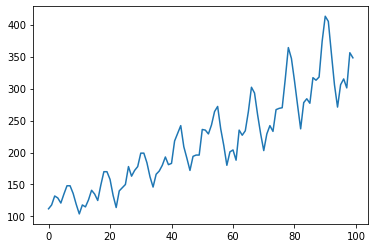

{'t_start': Timestamp('1949-01-01 00:00:00'), 't_scale': Timedelta('3591 days 00:00:00'), 'y_shift': 245.14285714285714, 'y_scale': 94.57106044763206}
time_idx.shape (108, 1)
input.shape (108, 12)
target.shape (108, 1)
1. Epoch Avg Loss:       1.87
2. Epoch Avg Loss:       1.73
3. Epoch Avg Loss:       1.58
4. Epoch Avg Loss:       1.42
5. Epoch Avg Loss:       1.32
6. Epoch Avg Loss:       1.24
7. Epoch Avg Loss:       1.14
8. Epoch Avg Loss:       1.07
9. Epoch Avg Loss:       1.03
10. Epoch Avg Loss:       0.97
11. Epoch Avg Loss:       0.93
12. Epoch Avg Loss:       0.90
13. Epoch Avg Loss:       0.88
14. Epoch Avg Loss:       0.84
15. Epoch Avg Loss:       0.83
16. Epoch Avg Loss:       0.80
17. Epoch Avg Loss:       0.78
18. Epoch Avg Loss:       0.76
19. Epoch Avg Loss:       0.76
20. Epoch Avg Loss:       0.73
21. Epoch Avg Loss:       0.75
22. Epoch Avg Loss:       0.72
23. Epoch Avg Loss:       0.71
24. Epoch Avg Loss:       0.70
25. Epoch Avg Loss:       0.69
26. Epoch Avg L

In [5]:
m = Bifrost(
    n_lags=seasonality, 
    n_forecasts=1, 
    n_trend=1, 
    normalize=True, 
    verbose=True,
)
m.fit(df_train)

In [6]:
m.evaluate(df_val)

NameError: name 'test' is not defined

##  Predict the Future

In [ ]:
m.fit(df)

In [ ]:
future = m.make_future_dataframe(periods=12)
future.tail()

In [ ]:
forecast = m.predict(future)

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)